# **cargar datos y target**

> conectarse a unidad Drive!!



In [1]:
#conectividadesdedaniel
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2020-12-16 20:06:32--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 108.177.97.100, 108.177.97.102, 108.177.97.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-48-docs.googleusercontent.com/docs/securesc/0e8jomvg2vrebu27nbd714aeent7m3s1/76ucosiilruaom6nk47u3cmiv5ueel80/1608149175000/17600740636788319470/16208420286313793790Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2020-12-16 20:06:35--  https://doc-10-48-docs.googleusercontent.com/docs/securesc/0e8jomvg2vrebu27nbd714aeent7m3s1/76ucosiilruaom6nk47u3cmiv5ueel80/1608149175000/17600740636788319470/16208420286313793790Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-10-48-docs.googleusercontent.com (doc-10-48-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to 

# **definir funciones y cargar modulos**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self

  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

In [5]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global_Eff', 'Path_Len', 'Strength'])

# **grafos sin umbralizar** 

'Clustering', 'Global_Eff', 'Path_Len', 'Strength'

## clustering

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')['Clustering']
indx = np.arange(1,len(grafos)+1)

#grafos.transpose(0,2,1)
xtensor = grafos
 
xtensor.shape

(105, 35, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)


In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  7.0min finished


-0.5809762988731324 8.174778379860083e-11
(-0.5809762988731325, 8.174778379860077e-11)
SpearmanrResult(correlation=-0.4881614150466668, pvalue=1.2746064547629117e-07)
mean_squared_error 0.39965659809202925
mean_absolute_error 0.3548589734692756
mean_absolute_percentage_error 35.48589734692756


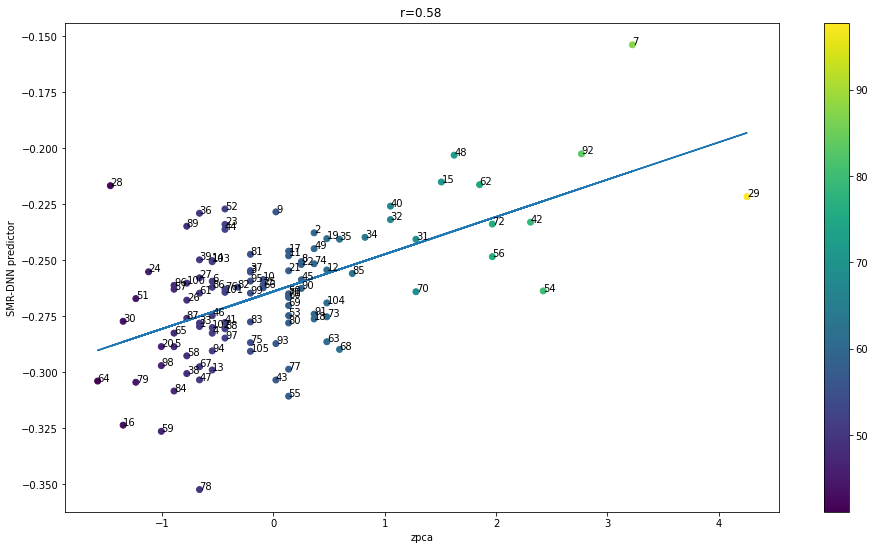

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))


scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)


regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## Global_Eff

## Path_Len

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')['Path_Len']
indx = np.arange(1,len(grafos)+1)
xtensor = grafos
xtensor.shape

(105, 35, 2)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  6.7min finished


-0.44588747314112237 1.8712487468382627e-06
(-0.44588747314112204, 1.871248746838305e-06)
SpearmanrResult(correlation=-0.30508597091135264, pvalue=0.0015530543302937478)
mean_squared_error 0.4369170304372257
mean_absolute_error 0.3910011905108959
mean_absolute_percentage_error 39.100119051089585


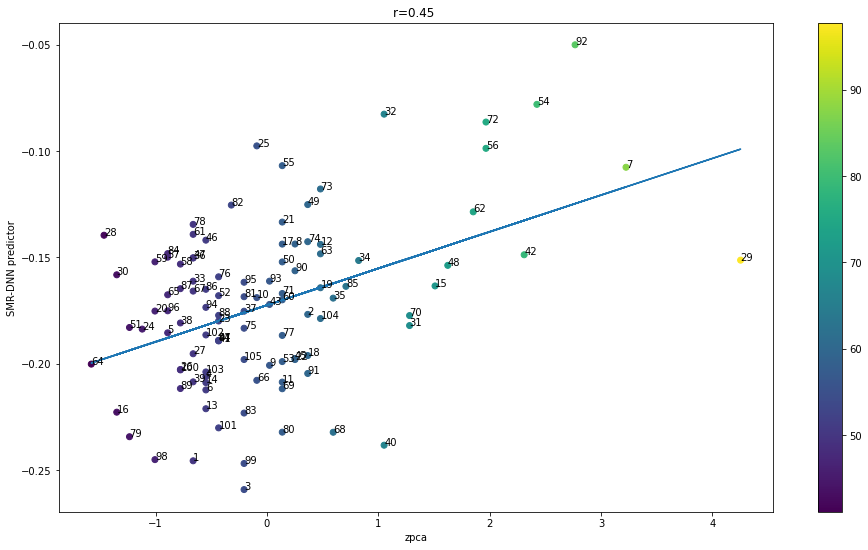

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))
scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## Strength

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')['Strength']
indx = np.arange(1,len(grafos)+1)
xtensor = grafos
xtensor.shape

(105, 35, 2)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  7.0min finished


-0.4416515849905184 2.4023871881952557e-06
(-0.44165158499051815, 2.402387188195273e-06)
SpearmanrResult(correlation=-0.2867229223680435, pvalue=0.0030229758768564297)
mean_squared_error 0.43941040602679204
mean_absolute_error 0.3943376567211249
mean_absolute_percentage_error 39.43376567211249


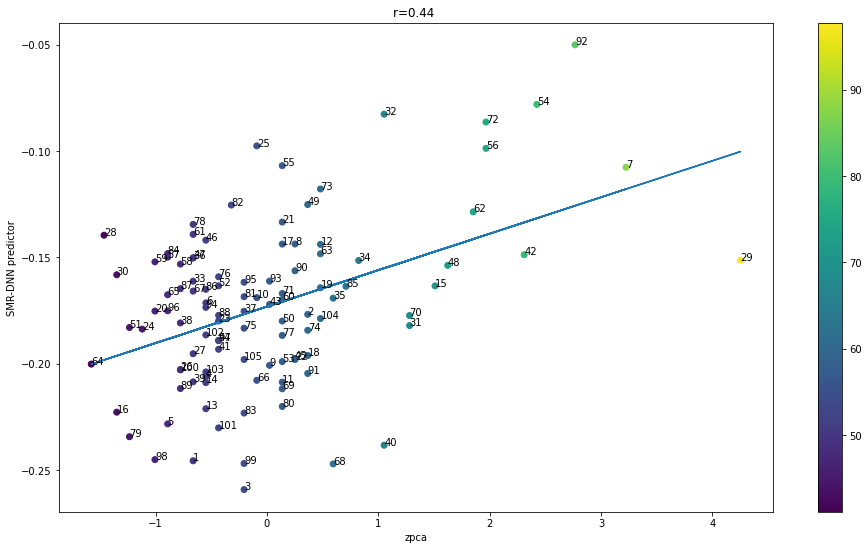

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))
scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# **grafos umbralizados** 

'Clustering', 'Global_Eff', 'Path_Len', 'Strength'

## clustering

In [ ]:
len(grafos)

105

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Clustering']
indx = np.arange(1,len(grafos)+1)
newindx = indx #usar este para no seleccionar tipos

xtensor = []
 
for i in newindx:
  subjs = grafos[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
#xtensor= np.delete(xtensor, 100 , axis=0)
xtensor.shape

(105, 2, 35)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 24.2min finished


(-0.2491433144682559, 0.010378736093693957)
mean_squared_error 0.3737507727472737
mean_absolute_error 0.31854116825941664
mean_absolute_percentage_error 31.854116825941663


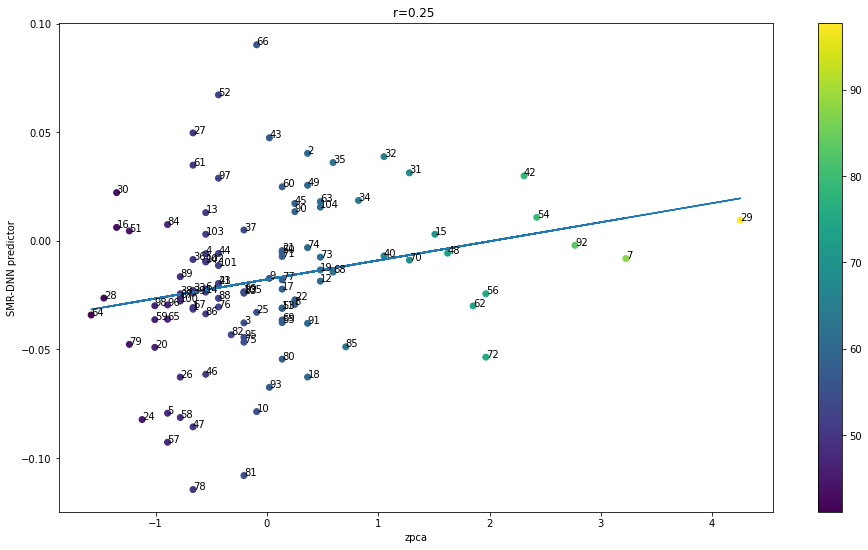

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## Global_Eff

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Global_Eff']
indx = np.arange(1,len(grafos)+1)
newindx = indx #usar este para no seleccionar tipos

xtensor = []
 
for i in newindx:
  subjs = grafos[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
#xtensor= np.delete(xtensor, 100 , axis=0)
xtensor.shape

(105, 2, 52)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 31.6min finished


(-0.19878204085101783, 0.042066519184890315)
mean_squared_error 0.33414664302796987
mean_absolute_error 0.2738380060810334
mean_absolute_percentage_error 27.383800608103343


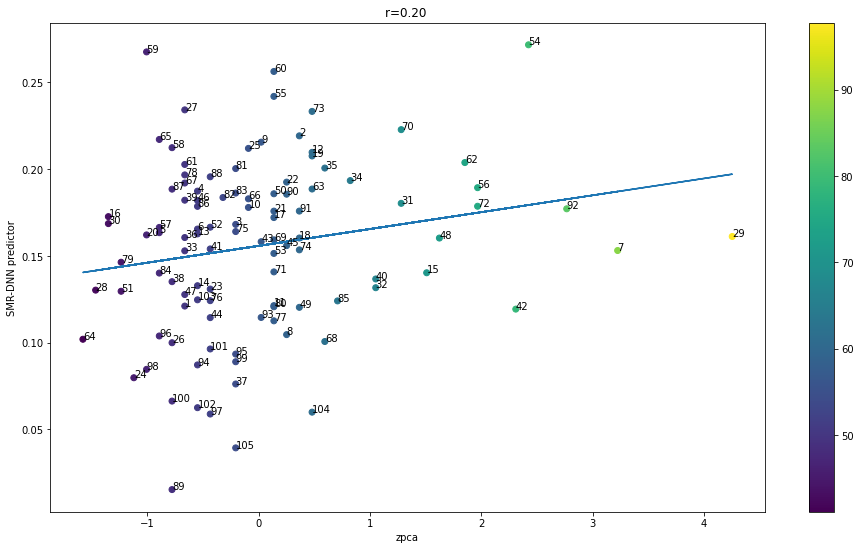

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## Path_Len

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Path_Len']
indx = np.arange(1,len(grafos)+1)
newindx = indx #usar este para no seleccionar tipos

xtensor = []
 
for i in newindx:
  subjs = grafos[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
#xtensor= np.delete(xtensor, 100 , axis=0)
xtensor.shape

(105, 2, 35)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 23.4min finished


(-0.2119395025392905, 0.02997221941922347)
mean_squared_error 0.3954764794765395
mean_absolute_error 0.33729466314520595
mean_absolute_percentage_error 33.72946631452059


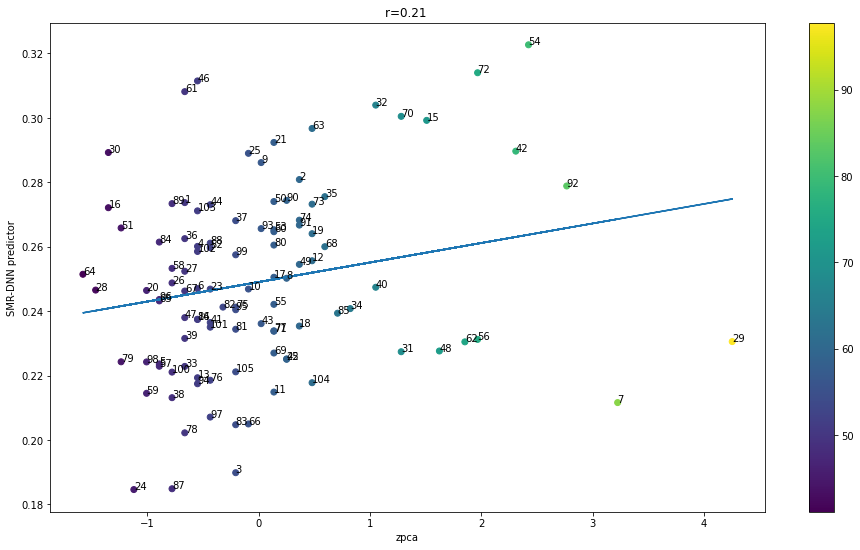

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## Strength

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Strength']
indx = np.arange(1,len(grafos)+1)
newindx = indx #usar este para no seleccionar tipos

xtensor = []
 
for i in newindx:
  subjs = grafos[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
#xtensor= np.delete(xtensor, 100 , axis=0)
xtensor.shape

(105, 2, 35)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 23.3min finished


(-0.16338076603610283, 0.09584810463126821)
mean_squared_error 0.299143012704986
mean_absolute_error 0.24510263798951434
mean_absolute_percentage_error 24.510263798951435


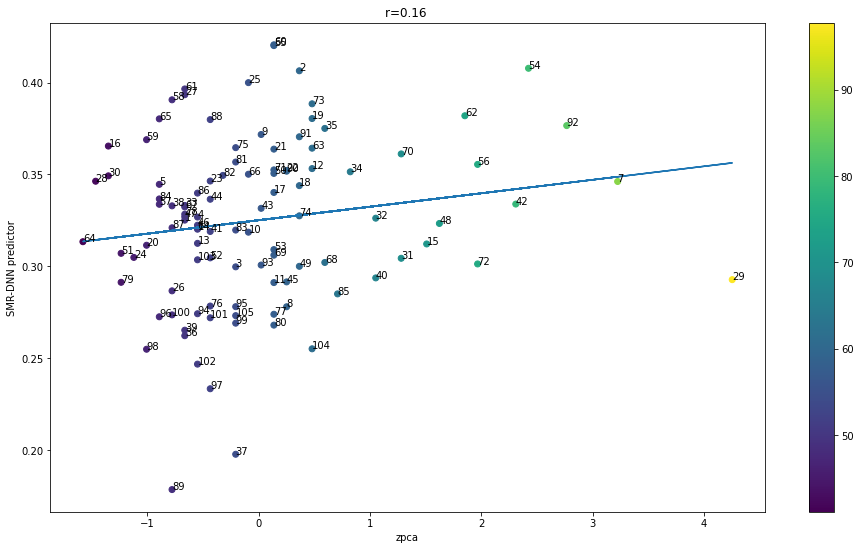

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# conectividad Daniel 



In [ ]:
!unzip /content/drive/MyDrive/CX_Regression/datosFrank/conectividad_physionet_sujetos.zip

Archive:  /content/drive/MyDrive/CX_Regression/datosFrank/conectividad_physionet_sujetos.zip
Written using ZipTricks 4.8.2
 extracting: Data_s65_phy.mat        
 extracting: Data_s29_phy.mat        
 extracting: Data_s26_phy.mat        
 extracting: Data_s89_phy.mat        
 extracting: Data_s105_phy.mat       
 extracting: Data_s97_phy.mat        
 extracting: Data_s56_phy.mat        
 extracting: Data_s58_phy.mat        
 extracting: Data_s49_phy.mat        
 extracting: Data_s54_phy.mat        
 extracting: Data_s33_phy.mat        
 extracting: Data_s47_phy.mat        
 extracting: Data_s57_phy.mat        
 extracting: Data_s88_phy.mat        
 extracting: Data_s98_phy.mat        
 extracting: Data_s94_phy.mat        
 extracting: Data_s95_phy.mat        
 extracting: Data_s85_phy.mat        
 extracting: Data_s44_phy.mat        
 extracting: Data_s27_phy.mat        
 extracting: Data_s76_phy.mat        
 extracting: Data_s72_phy.mat        
 extracting: Data_s52_phy.mat        
 ex

In [ ]:
! pip install bctpy
! pip install mne==0.19

     |████████████████████████████████| 112kB 16.6MB/s 
     |████████████████████████████████| 6.4MB 9.1MB/s 


In [ ]:
#%% descargar código de funciones  para motor imagery
#%% download data
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt
#%% download data


--2020-12-15 23:47:59--  https://docs.google.com/uc?export=download&confirm=&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/8shpbc8fgumu68kik4o6fjipn55u1blr/7cue48qsu4mo1l3hg3ugd8c7tjotn4he/1608076050000/06932581800131476027/04672050611618097212Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download [following]
--2020-12-15 23:47:59--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/8shpbc8fgumu68kik4o6fjipn55u1blr/7cue48qsu4mo1l3hg3ugd8c7tjotn4he/1608076050000/06932581800131476027/04672050611618097212Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download
Resolving doc-14-3o-docs.googleusercontent.com (doc-14-3o-docs.googleusercontent.com)... 172.217.12.225, 2607:f8b0:4004:807::2001
Connecting to doc-14-3o

In [ ]:
conectividad = loadmat('/content/Data_s1_phy.mat')['data_laplacian']
print(conectividad.shape)
indx = np.arange(1,106)
#crear tensor (sujeto x canales x tiempo)
xtensor = []
subs_order = indx
for i in subs_order:
  try:
    s=loadmat('/content/Data_s'+str(i)+'_phy.mat')['data_laplacian']
    s=s[0:6350].T
    xtensor+=[s]
  except:
    print('s'+str(i+1)+'_phy.mat')
xtensor= np.asarray(xtensor)
xtensor.shape

(6561, 64)


(105, 64, 6350)

In [ ]:
import MIfunctions as MIf
#objeto de MIfunctions [4,8],[8,12],[12,16]
model = MIf.FB_feats(fs=160,f_frec=np.array([[8,12],[12,16]]),vtw=np.array([[1,55]]),feat='PLV')
x=model.transform(xtensor)

In [ ]:
X= x.reshape(105, int((64*(64-1))/2), 2, 1)
X.shape

(105, 2016, 2, 1)

In [ ]:

with open('connectividad_daniel_phy_2bandas.pickle', 'wb') as f:
    pickle.dump(X, f)

In [ ]:
a= X[:,:,:,0]
print(a.shape)
estimator= SMRfeat()
frecuency_data = estimator.fit_transform(a)
conectividad_daniel_phy = a

(105, 2016, 2)


In [ ]:
##guardar conectividad
conectividad_daniel=x
with open('connectividad_daniel_phy.pickle', 'wb') as f:
    pickle.dump(conectividad_daniel_phy, f)

In [ ]:
##cargar conectividad
x= pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
x.shape

(105, 2016, 3, 1)

## rendimiento por sujeto 


In [ ]:
############ rendimiento por sujeto

connectividad= X[:,:,:,0]
connectividad.shape
indx = np.arange(0,len(connectividad))
tip1 = 1
tip2 = 1

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

        
newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))

########################
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  try:
    subjs = connectividad[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i))
xtensor= np.asarray(xtensor)
xtensor.shape


a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape


43
(43, 1)


(43, 1)

In [ ]:
a=x[:,:,:,0]
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 

mean_squared_error 0.4175606330924162
mean_absolute_error 0.36350423023035094
-0.4249644012033203 6.225832653927643e-06


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 44.3min finished


## todos los sujetos


In [ ]:
mea = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
a.shape

(105, 2016, 3, 1)

In [ ]:
a = x[:,:,:,0]
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   54.8s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 

-0.4650991666631447 5.771079823663105e-07
(-0.46509916666314427, 5.771079823663257e-07)
mean_squared_error 0.421187046238018
mean_absolute_error 0.37469329077656527
mean_absolute_percentage_error 37.469329077656525


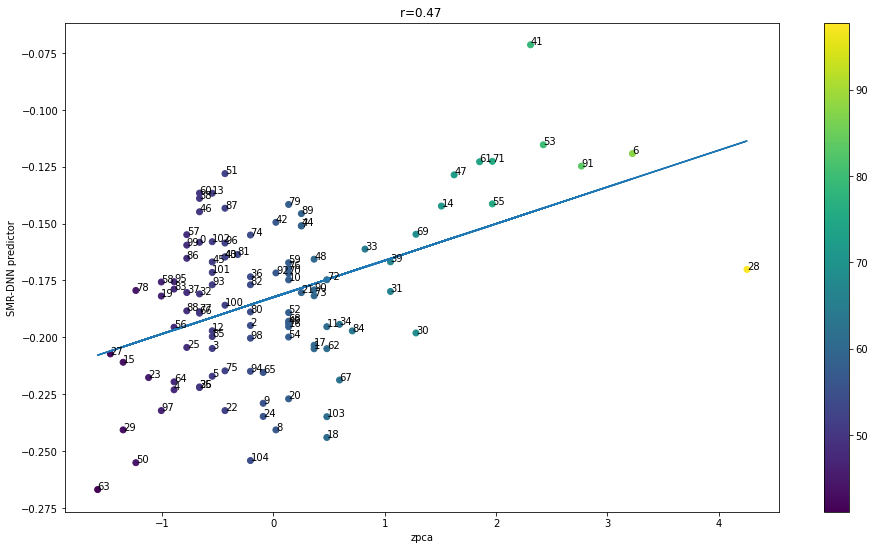

In [ ]:
indx = np.arange(0,len(a))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# conectividad Frank

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')['Global_Eff']
indx = np.arange(1,len(grafos)+1)
xtensor = grafos
xtensor.shape

(105, 52, 2)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  6.9min finished


-0.20648250033416207 0.034573475804819176
(-0.20648250033416196, 0.03457347580481931)
SpearmanrResult(correlation=-0.18727197133066367, pvalue=0.0557536440288921)
mean_squared_error 0.3646770302325207
mean_absolute_error 0.32558879105428123
mean_absolute_percentage_error 32.558879105428126


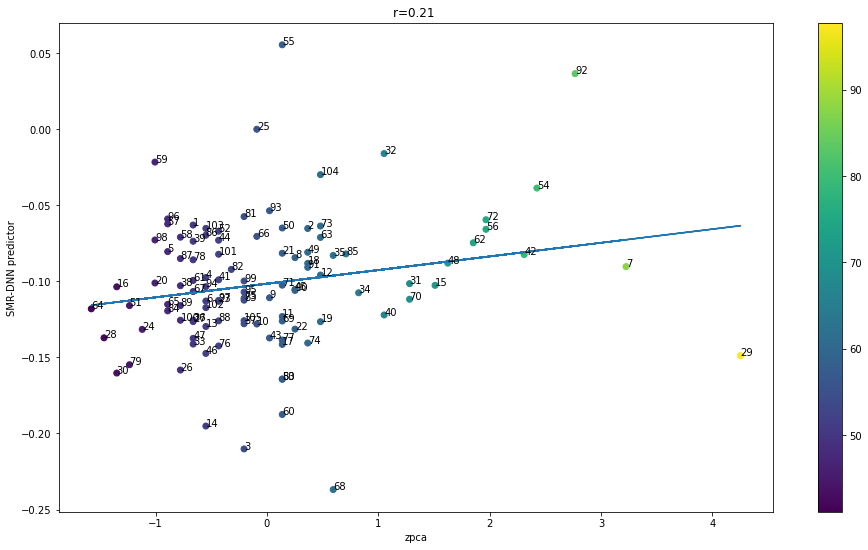

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))

scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

In [ ]:
connectividad= loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/connectividad_phy.mat')['Cx_rest_']
connectividad.shape

newindx= np.arange(0,106)
xtensor = []
 
for i in newindx:
  try:
    subjs=[]
    s1= connectividad[0][i][0][0][0]             #loadmat('Cx_s'+str(i)+'.mat')['Cx_rest_'][0][1][0]
    s0= connectividad[0][i][0][1][0]             #loadmat('Cx_s'+str(i)+'.mat')['Cx_rest_'][0][0][0]
    subjs = [s0 , s1]
    subjs= np.asarray(subjs)
    subjs = subjs.T
    # subjs= np.asarray(subjs)
    # subjs.T.shape
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))
xtensor= np.asarray(xtensor)
xtensor=np.delete(xtensor, 100, axis=0)
xtensor.shape


(105, 2016, 2)

In [ ]:
a=xtensor
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 23.3min finished


-0.5245926367431589 9.2398917209588e-09
(-0.5245926367431585, 9.239891720959043e-09)
mean_squared_error 0.3543921181292033
mean_absolute_error 0.3050194669476632
mean_absolute_percentage_error 30.501946694766318


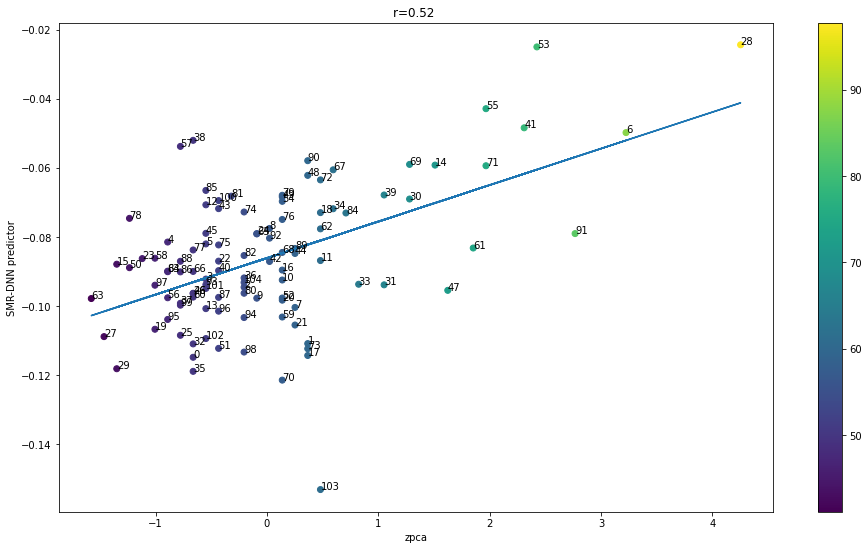

In [ ]:
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

scm = MinMaxScaler()
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],newindx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# conectividad Frank neuvos datos


In [ ]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

--2020-12-16 19:13:46--  https://docs.google.com/uc?export=download&confirm=&id=1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6
Resolving docs.google.com (docs.google.com)... 172.217.15.78, 2607:f8b0:4004:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-4s-docs.googleusercontent.com/docs/securesc/b3evjhvptsjp48sqbbabo4ljd5se6kl8/3jbifovufv2ihm6btg0lklc9a8gkl188/1608146025000/17600740636788319470/14715284069200649270Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download [following]
--2020-12-16 19:13:47--  https://doc-0o-4s-docs.googleusercontent.com/docs/securesc/b3evjhvptsjp48sqbbabo4ljd5se6kl8/3jbifovufv2ihm6btg0lklc9a8gkl188/1608146025000/17600740636788319470/14715284069200649270Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download
Resolving doc-0o-4s-docs.googleusercontent.com (doc-0o-4s-docs.googleusercontent.com)... 172.217.164.161, 2607:f8b0:4004:815::2001
Connecting to doc-0o-4s-

In [ ]:
grafos = loadmat('Conectividad_wpli_physionet.mat')
grafos['Cxa'].shape

(105, 2016, 4)

In [ ]:
grafos = loadmat('Conectividad_wpli_physionet.mat')
a=grafos['Cxa'][:,:,[0,1,3]]
mea = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

In [ ]:
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 

# por rendimiento de sujeto

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global_Eff', 'Path_Len', 'Strength'])

In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
graf=grafos['Strength']
indx = np.arange(0,len(graf))
#crear tensor (sujeto x canales x tiempo)
tip1 = 0
tip2 = 1

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [0 ,2 ,1 ,1 ,0 ,0 ,2 ,0 ,1 ,1 ,2 ,2 ,0 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,2 ,0 ,0 ,1 ,2 ,0 ,1 ,1 ,2 ,0 ,2 
#          ,2 ,1 ,2 ,2 ,0 ,1 ,1 ,1 ,2 ,1 ,2 ,1 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,1 ,0 ,0 ,2 ,0 ,2
#          ,2 ,0 ,1 ,1 ,0 ,2 ,1 ,2 ,1 ,2 ,2 ,2 ,1 ,0 ,1 ,1 ,1 ,0 ,2 ,0 ,1 ,1 ,2 ,0 ,0 ,1 ,0 ,2 ,2 ,2 ,1
#          ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,2 ,1]
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))
#######
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  
  try:
    subjs= graf[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
print(xtensor.shape)


a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape


94
(94, 1)
(94, 35, 2)


(94, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min


mean_squared_error 0.377041144391823
mean_absolute_error 0.2890569182003249
-0.3748103908385891 0.0016376562300893637


[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:  4.1min finished


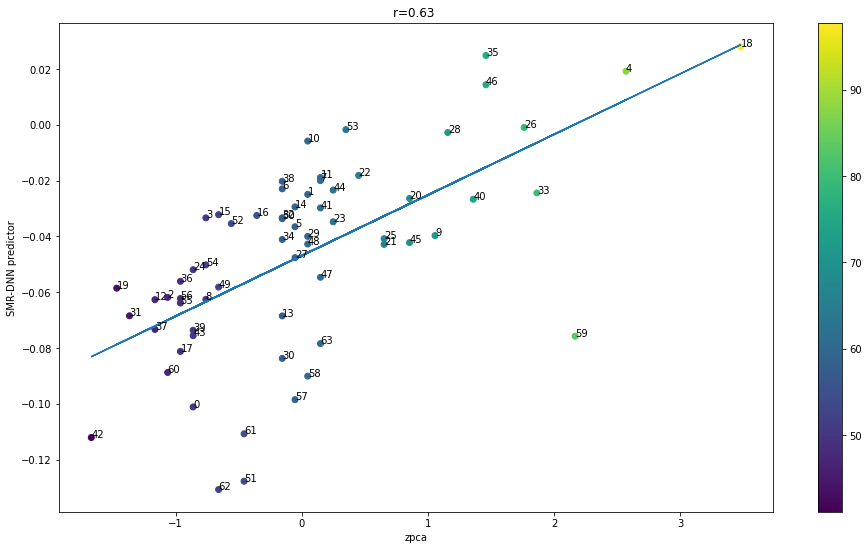

In [ ]:
##grafica! 
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# rendimiento sujeto, conectividad


In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)

connectividad= loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/connectividad_phy.mat')['Cx_rest_']
connectividad.shape
indx = np.arange(0,connectividad.shape[1])

tip1 = 1
tip2 = 0

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
        
newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))

########################
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  try:
    subjs=[]
    s1= connectividad[0][i][0][0][0]             #loadmat('Cx_s'+str(i)+'.mat')['Cx_rest_'][0][1][0]
    s0= connectividad[0][i][0][1][0]             #loadmat('Cx_s'+str(i)+'.mat')['Cx_rest_'][0][0][0]
    subjs = [s0 , s1]
    subjs= np.asarray(subjs)
    subjs = subjs.T
    # subjs= np.asarray(subjs)
    # subjs.T.shape
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))
xtensor= np.asarray(xtensor)
xtensor.shape


a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape


94
(94, 1)


(94, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.9s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 

mean_squared_error 0.38554614610826876
mean_absolute_error 0.3194940127545575
-0.560593846932129 4.205616967622347e-09


[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed: 12.0min finished


# purevas po rendimiento de sujeto

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
tip1 = 0
tip2 = 1
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global_Eff', 'Path_Len', 'Strength'])

## clustering


In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
graf=grafos['Clustering']
indx = np.arange(0,len(graf))
#crear tensor (sujeto x canales x tiempo)

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [0 ,2 ,1 ,1 ,0 ,0 ,2 ,0 ,1 ,1 ,2 ,2 ,0 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,2 ,0 ,0 ,1 ,2 ,0 ,1 ,1 ,2 ,0 ,2 
#          ,2 ,1 ,2 ,2 ,0 ,1 ,1 ,1 ,2 ,1 ,2 ,1 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,1 ,0 ,0 ,2 ,0 ,2
#          ,2 ,0 ,1 ,1 ,0 ,2 ,1 ,2 ,1 ,2 ,2 ,2 ,1 ,0 ,1 ,1 ,1 ,0 ,2 ,0 ,1 ,1 ,2 ,0 ,0 ,1 ,0 ,2 ,2 ,2 ,1
#          ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,2 ,1]
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))
#######
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  
  try:
    subjs= graf[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
print(xtensor.shape)
############

a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape
############
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

94
(94, 1)
(94, 35, 2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.0min


mean_squared_error 0.314501369699161
mean_absolute_error 0.237303757924009
-0.37050393423942557 0.00023707552775690608


[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  5.8min finished


## global

In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
graf=grafos['Global_Eff']
indx = np.arange(0,len(graf))
#crear tensor (sujeto x canales x tiempo)


#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [0 ,2 ,1 ,1 ,0 ,0 ,2 ,0 ,1 ,1 ,2 ,2 ,0 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,2 ,0 ,0 ,1 ,2 ,0 ,1 ,1 ,2 ,0 ,2 
#          ,2 ,1 ,2 ,2 ,0 ,1 ,1 ,1 ,2 ,1 ,2 ,1 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,1 ,0 ,0 ,2 ,0 ,2
#          ,2 ,0 ,1 ,1 ,0 ,2 ,1 ,2 ,1 ,2 ,2 ,2 ,1 ,0 ,1 ,1 ,1 ,0 ,2 ,0 ,1 ,1 ,2 ,0 ,0 ,1 ,0 ,2 ,2 ,2 ,1
#          ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,2 ,1]
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))
#######
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  
  try:
    subjs= graf[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
print(xtensor.shape)
############

a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape
############
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


94
(94, 1)
(94, 52, 2)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.0min


mean_squared_error 0.2862306549236051
mean_absolute_error 0.22769131703942017
-0.15348595976965113 0.13968699361937714


[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  5.7min finished


## path

In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
graf=grafos['Path_Len']
indx = np.arange(0,len(graf))
#crear tensor (sujeto x canales x tiempo)


#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [0 ,2 ,1 ,1 ,0 ,0 ,2 ,0 ,1 ,1 ,2 ,2 ,0 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,2 ,0 ,0 ,1 ,2 ,0 ,1 ,1 ,2 ,0 ,2 
#          ,2 ,1 ,2 ,2 ,0 ,1 ,1 ,1 ,2 ,1 ,2 ,1 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,1 ,0 ,0 ,2 ,0 ,2
#          ,2 ,0 ,1 ,1 ,0 ,2 ,1 ,2 ,1 ,2 ,2 ,2 ,1 ,0 ,1 ,1 ,1 ,0 ,2 ,0 ,1 ,1 ,2 ,0 ,0 ,1 ,0 ,2 ,2 ,2 ,1
#          ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,2 ,1]
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))
#######
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  
  try:
    subjs= graf[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
print(xtensor.shape)
############

a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape
############
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


94
(94, 1)
(94, 35, 2)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.0min


mean_squared_error 0.28931388630389954
mean_absolute_error 0.22345210897161624
-0.3804437541255794 0.0001552894719663964


[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  5.7min finished


## strength

In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
graf=grafos['Strength']
indx = np.arange(0,len(graf))
#crear tensor (sujeto x canales x tiempo)


#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
# tipos = [0 ,2 ,1 ,1 ,0 ,0 ,2 ,0 ,1 ,1 ,2 ,2 ,0 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,2 ,0 ,0 ,1 ,2 ,0 ,1 ,1 ,2 ,0 ,2 
#          ,2 ,1 ,2 ,2 ,0 ,1 ,1 ,1 ,2 ,1 ,2 ,1 ,1 ,2 ,1 ,1 ,2 ,2 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,1 ,0 ,0 ,2 ,0 ,2
#          ,2 ,0 ,1 ,1 ,0 ,2 ,1 ,2 ,1 ,2 ,2 ,2 ,1 ,0 ,1 ,1 ,1 ,0 ,2 ,0 ,1 ,1 ,2 ,0 ,0 ,1 ,0 ,2 ,2 ,2 ,1
#          ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,2 ,1]
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


newindx = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newindx+= [indx[i]]
print(len(newindx))
#######
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']

newmea = []
for i in range(0, len(tipos)):
  if tipos[i]==tip1 or tipos[i]==tip2:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  
  try:
    subjs= graf[i,:,:]
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
print(xtensor.shape)
############

a=xtensor
mea = newmea 

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))
zpca.shape
############
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


94
(94, 1)
(94, 35, 2)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.9min


mean_squared_error 0.2984142619340472
mean_absolute_error 0.2265443301400154
-0.18691690276562442 0.07124492184204073


[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  5.7min finished


# todos los grafos


In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v1_phy.mat')
indx   = np.arange(1,len(grafos['Clustering'])+1)
clust  = np.expand_dims(grafos['Clustering'], axis=3) 
glob   = np.expand_dims(grafos['Global_Eff'], axis=3)
path   = np.expand_dims(grafos['Path_Len'], axis=3)
stren  = np.expand_dims(grafos['Strength'], axis=3)
print(clust.shape, glob.shape, path.shape, stren.shape)

all_graf= np.concatenate([clust, glob, path, stren], axis=3)
print(all_graf.shape)


# all_graf= np.concatenate([clust, glob, path, stren], axis=3)
# all_graf.shape

(105, 35, 2, 1) (105, 35, 2, 1) (105, 35, 2, 1) (105, 35, 2, 1)
(105, 35, 2, 4)


In [ ]:
#grafos.transpose(0,2,1)
xtensor = grafos

data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))



In [ ]:
class SMRfeatmultiple(BaseEstimator, TransformerMixin):
  def __init__(self):
    self

  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xtmp = [Xepochs[:,:,:,i] for i in range(Xepochs.shape[3])]
      Xfull = []
      for j in range(len(Xtmp)):
         Xfull+= [Xtmp[j][:,:,i] for i in range(Xtmp[j].shape[2])]
         
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):        
          
      
      Xtmp = [Xepochs[:,:,:,i] for i in range(Xepochs.shape[3])]
      Xfull = []
      for j in range(len(Xtmp)):
         Xfull+= [Xtmp[j][:,:,i] for i in range(Xtmp[j].shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):

      self.fit(Xepochs)
      return self.transform(Xepochs)   

In [ ]:
a=all_graf
steps = [('smrfeat', SMRfeatmultiple()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 10.0min finished


mean_squared_error 0.44321757385422855
mean_absolute_error 0.3854977413441509
mean_absolute_percentage_error 38.54977413441509
-0.4498844838303648


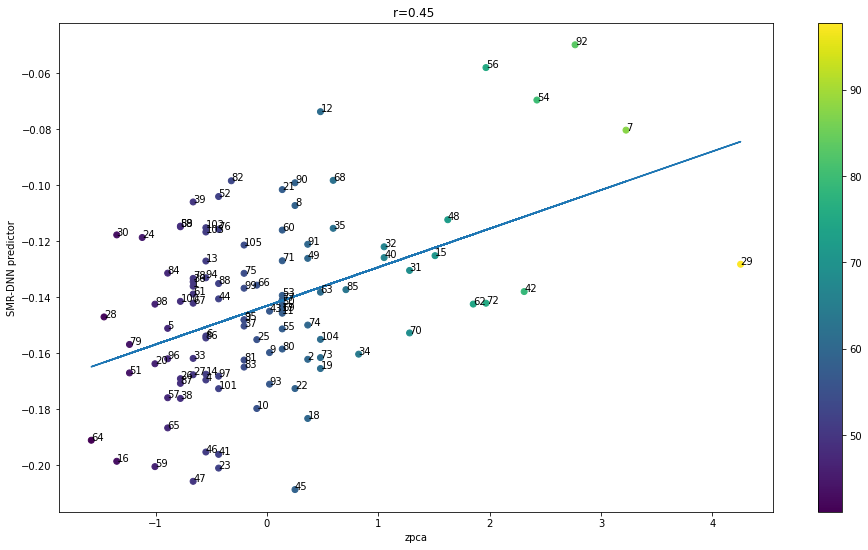

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print(r_value)
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## todos los grafos montecarlo

### funciones de montecarlo todos los grafos


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from time import time


In [ ]:
def split_loo(X,y,indx):
    X_test = np.expand_dims(X[indx,:,:],axis=0)
    y_test = y[indx,:]
    X_train = np.delete(X,indx,axis=0)
    y_train = np.delete(y,indx,axis=0)
    return X_train,y_train,X_test,y_test

def fit_predict_Mc_dropout(X,y,verbose=True):
    y_pred = X.shape[0]*[None]
    t = 0
    for i in range(X.shape[0]):
        ti = time()

        X_train,y_train,X_test,y_test = split_loo(X,y,i)
        
        mdl = Pipeline([
            ('Feats',SMRfeatmultiple()),
            ('SRMDNN',SMRDNN(verbose=0,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,alpha_dropout=False))
        ])

        mdl.fit(X_train,y_train)
        y_pred[i] = mdl.predict(X_test).ravel()

        te = time()
        t+=te-ti
        if verbose:
            print("iter: "+str(i+1)+" of "+str(X.shape[0])+" ====> elapsed time: "+str((te-ti)/60)+" min")
    
    print("\nTotal time = "+str(t/60)+" min")

    y_pred = np.asarray(y_pred)
    return y_pred
def plot_regression(y,y_pred):
    scm = MinMaxScaler()

    ypred = np.mean(y_pred,axis=1).reshape(-1,1)
    std_y = np.std(scm.fit_transform(y_pred),axis=1)

    XX = scm.fit_transform(y)
    YY = scm.fit_transform(-ypred)
    
    _, _, r_value, p_value, _ = linregress(XX.reshape(-1),YY.reshape(-1))

    indx = np.arange(1,len(grafos)+1)

    regr = linear_model.LinearRegression()
    regr.fit(XX.reshape(-1,1),YY.reshape(-1,1))
    lrpred = regr.predict(XX.reshape(-1,1))
    #plt.figure(figsize=(16,9))
    #xx = np.linspace(XX.min(),XX.max(),XX.shape[0])
    #yy = np.linspace(YY.min(),YY.max(),XX.shape[0])
    #plt.plot(xx,yy)
    #plt.fill_between(xx.ravel(),yy.ravel()+0.95*std_y,yy.ravel()-0.95*std_y,color="b",alpha=0.2)
    #plt.scatter(XX,YY,c=acc_m)

    #for i in range(XX.shape[0]):
    #    plt.text(XX[i],YY[i],indx[i])
    #plt.xlabel('Accuracy')
    #plt.ylabel('FCx Predictor')
    #plt.title('r=%.2f '%abs(r_value))
    #plt.colorbar()
    #plt.show()

    print('r_value', abs(r_value))
    print('p_value',p_value)
    print('mean_squared_error', np.sqrt(mean_squared_error(XX,YY)))
    print('mean_absolute_error', mean_absolute_error(XX,YY))
    
    return abs(r_value),p_value,np.sqrt(mean_squared_error(XX,YY)),mean_absolute_error(XX,YY)

## ejecutar montecarlo



In [ ]:
##primero correr las funciones de montecarlo
X = all_graf
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 35, 2, 4) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.14168513615926107 min
iter: 2 of 105 ====> elapsed time: 0.13969424565633137 min
iter: 3 of 105 ====> elapsed time: 0.1389857570330302 min
iter: 4 of 105 ====> elapsed time: 0.13447345495224 min
iter: 5 of 105 ====> elapsed time: 0.1373322606086731 min
iter: 6 of 105 ====> elapsed time: 0.1330053448677063 min
iter: 7 of 105 ====> elapsed time: 0.13581527868906657 min
iter: 8 of 105 ====> elapsed time: 0.1320531924565633 min
iter: 9 of 105 ====> elapsed time: 0.13728953997294108 min
iter: 10 of 105 ====> elapsed time: 0.1326087236404419 min
iter: 11 of 105 ====> elapsed time: 0.1326414903004964 min
iter: 12 of 105 ====> elapsed time: 0.1365403731664022 min
iter: 13 of 105 ====> elapsed time: 0.13206402063369752 min
iter: 14 of 105 ====> elapsed time: 0.13062610228856406 min
iter: 15 of 105 ====> elapsed time: 0.13517340421676635 min
iter: 16 of 105 ====> elapsed time: 0.13328535556793214 min
iter: 17 of 105 ====> elapsed time

# montecarlo


## funciones de montecarlo

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from time import time


In [7]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate,seed=seed)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [8]:
def split_loo(X,y,indx):
    X_test = np.expand_dims(X[indx,:,:],axis=0)
    y_test = y[indx,:]
    X_train = np.delete(X,indx,axis=0)
    y_train = np.delete(y,indx,axis=0)
    return X_train,y_train,X_test,y_test

def fit_predict_Mc_dropout(X,y,verbose=True):
    y_pred = X.shape[0]*[None]
    t = 0
    for i in range(X.shape[0]):
        ti = time()

        X_train,y_train,X_test,y_test = split_loo(X,y,i)
        
        mdl = Pipeline([
            ('Feats',SMRfeat()),
            ('SRMDNN',SMRDNN(verbose=0,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,alpha_dropout=False))
        ])

        mdl.fit(X_train,y_train)
        y_pred[i] = mdl.predict(X_test).ravel()

        te = time()
        t+=te-ti
        if verbose:
            print("iter: "+str(i+1)+" of "+str(X.shape[0])+" ====> elapsed time: "+str((te-ti)/60)+" min")
    
    print("\nTotal time = "+str(t/60)+" min")

    y_pred = np.asarray(y_pred)
    return y_pred
def plot_regression(y,y_pred):
    scm = MinMaxScaler()

    ypred = np.mean(y_pred,axis=1).reshape(-1,1)
    std_y = np.std(scm.fit_transform(y_pred),axis=1)

    XX = scm.fit_transform(y)
    YY = scm.fit_transform(-ypred)
    
    _, _, r_value, p_value, _ = linregress(XX.reshape(-1),YY.reshape(-1))

    indx = np.arange(1,len(grafos)+1)

    regr = linear_model.LinearRegression()
    regr.fit(XX.reshape(-1,1),YY.reshape(-1,1))
    lrpred = regr.predict(XX.reshape(-1,1))
    #plt.figure(figsize=(16,9))
    #xx = np.linspace(XX.min(),XX.max(),XX.shape[0])
    #yy = np.linspace(YY.min(),YY.max(),XX.shape[0])
    #plt.plot(xx,yy)
    #plt.fill_between(xx.ravel(),yy.ravel()+0.95*std_y,yy.ravel()-0.95*std_y,color="b",alpha=0.2)
    #plt.scatter(XX,YY,c=acc_m)

    #for i in range(XX.shape[0]):
    #    plt.text(XX[i],YY[i],indx[i])
    #plt.xlabel('Accuracy')
    #plt.ylabel('FCx Predictor')
    #plt.title('r=%.2f '%abs(r_value))
    #plt.colorbar()
    #plt.show()

    print('r_value', abs(r_value))
    print('p_value',p_value)
    print('mean_squared_error', np.sqrt(mean_squared_error(XX,YY)))
    print('mean_absolute_error', mean_absolute_error(XX,YY))
    
    return abs(r_value),p_value,np.sqrt(mean_squared_error(XX,YY)),mean_absolute_error(XX,YY)

## clustering 

In [ ]:
grafos = x[:,:,:,0]
indx = np.arange(1,len(grafos)+1)

#grafos.transpose(0,2,1)
xtensor = grafos
 
xtensor.shape
########## definir Y
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)
X = xtensor
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 2016, 3) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.417562727133433 min
iter: 2 of 105 ====> elapsed time: 0.3990615646044413 min
iter: 3 of 105 ====> elapsed time: 0.3955127835273743 min
iter: 4 of 105 ====> elapsed time: 0.39524585803349815 min
iter: 5 of 105 ====> elapsed time: 0.3956425627072652 min
iter: 6 of 105 ====> elapsed time: 0.3959748109181722 min
iter: 7 of 105 ====> elapsed time: 0.3994301160176595 min
iter: 8 of 105 ====> elapsed time: 0.3946881333986918 min
iter: 9 of 105 ====> elapsed time: 0.39487123489379883 min
iter: 10 of 105 ====> elapsed time: 0.3956019043922424 min
iter: 11 of 105 ====> elapsed time: 0.39559866189956666 min
iter: 12 of 105 ====> elapsed time: 0.3982333421707153 min
iter: 13 of 105 ====> elapsed time: 0.3953847567240397 min
iter: 14 of 105 ====> elapsed time: 0.39515403111775715 min
iter: 15 of 105 ====> elapsed time: 0.39549272060394286 min
iter: 16 of 105 ====> elapsed time: 0.3957899332046509 min
iter: 17 of 105 ====> elapsed time: 0

In [ ]:
r_value, p_value,mse,mae= plot_regression(y,y_pred)

r_value 0.46743427502608736
p_value 4.977518164204498e-07
mean_squared_error 0.3314653986568064
mean_absolute_error 0.2907369351854511


## global


In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Global_Eff']
indx = np.arange(1,len(grafos)+1)

#grafos.transpose(0,2,1)
xtensor = grafos
 
xtensor.shape
########## definir Y
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)
X = xtensor
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 52, 2) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.07410082022349039 min
iter: 2 of 105 ====> elapsed time: 0.07785006761550903 min
iter: 3 of 105 ====> elapsed time: 0.07569831212361654 min
iter: 4 of 105 ====> elapsed time: 0.07614471117655436 min
iter: 5 of 105 ====> elapsed time: 0.07689439058303833 min
iter: 6 of 105 ====> elapsed time: 0.07629135847091675 min
iter: 7 of 105 ====> elapsed time: 0.07762468258539836 min
iter: 8 of 105 ====> elapsed time: 0.07456643184026082 min
iter: 9 of 105 ====> elapsed time: 0.0739326278368632 min
iter: 10 of 105 ====> elapsed time: 0.07410562435785929 min
iter: 11 of 105 ====> elapsed time: 0.07347455819447836 min
iter: 12 of 105 ====> elapsed time: 0.07335289319356282 min
iter: 13 of 105 ====> elapsed time: 0.07753979365030925 min
iter: 14 of 105 ====> elapsed time: 0.07384890715281169 min
iter: 15 of 105 ====> elapsed time: 0.0743655284245809 min
iter: 16 of 105 ====> elapsed time: 0.07402139107386271 min
iter: 17 of 105 ====> elapsed

## path 

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Path_Len']
indx = np.arange(1,len(grafos)+1)

#grafos.transpose(0,2,1)
xtensor = grafos
 
xtensor.shape
########## definir Y
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)
X = xtensor
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 35, 2) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.08127734661102295 min
iter: 2 of 105 ====> elapsed time: 0.07650327285130819 min
iter: 3 of 105 ====> elapsed time: 0.07553106943766276 min
iter: 4 of 105 ====> elapsed time: 0.07449752887090047 min
iter: 5 of 105 ====> elapsed time: 0.07466383775075276 min
iter: 6 of 105 ====> elapsed time: 0.07351717948913575 min
iter: 7 of 105 ====> elapsed time: 0.07754282951354981 min
iter: 8 of 105 ====> elapsed time: 0.07368399302164713 min
iter: 9 of 105 ====> elapsed time: 0.07373482783635457 min
iter: 10 of 105 ====> elapsed time: 0.0741496205329895 min
iter: 11 of 105 ====> elapsed time: 0.07324729363123576 min
iter: 12 of 105 ====> elapsed time: 0.07323958079020182 min
iter: 13 of 105 ====> elapsed time: 0.07772771120071412 min
iter: 14 of 105 ====> elapsed time: 0.07389647563298543 min
iter: 15 of 105 ====> elapsed time: 0.07371058861414591 min
iter: 16 of 105 ====> elapsed time: 0.07406293948491414 min
iter: 17 of 105 ====> elapse

## strength

In [ ]:
grafos = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Datos_grafos_medidas_v2_phy.mat')['Strength']
indx = np.arange(1,len(grafos)+1)

#grafos.transpose(0,2,1)
xtensor = grafos
 
xtensor.shape
########## definir Y
data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)
X = xtensor
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 35, 2) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.07753169139226278 min
iter: 2 of 105 ====> elapsed time: 0.07728650569915771 min
iter: 3 of 105 ====> elapsed time: 0.07737801472345988 min
iter: 4 of 105 ====> elapsed time: 0.0738114317258199 min
iter: 5 of 105 ====> elapsed time: 0.07355626026789347 min
iter: 6 of 105 ====> elapsed time: 0.07802671988805135 min
iter: 7 of 105 ====> elapsed time: 0.07396165529886882 min
iter: 8 of 105 ====> elapsed time: 0.07390493551890055 min
iter: 9 of 105 ====> elapsed time: 0.07319200038909912 min
iter: 10 of 105 ====> elapsed time: 0.07450092633565267 min
iter: 11 of 105 ====> elapsed time: 0.07351252635320028 min
iter: 12 of 105 ====> elapsed time: 0.07731830676396688 min
iter: 13 of 105 ====> elapsed time: 0.07357845306396485 min
iter: 14 of 105 ====> elapsed time: 0.07361762523651123 min
iter: 15 of 105 ====> elapsed time: 0.07542144457499186 min
iter: 16 of 105 ====> elapsed time: 0.07448559602101644 min
iter: 17 of 105 ====> elapse

## conectividad Frank

In [ ]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

--2020-12-16 20:02:31--  https://docs.google.com/uc?export=download&confirm=&id=1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6
Resolving docs.google.com (docs.google.com)... 172.217.7.206, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-7o-docs.googleusercontent.com/docs/securesc/bact7i1ia6cdt8niaeu0kbdm9gvdhaun/1a77rokrdagmpo3cshm9dm4tsktnvpqm/1608148950000/17600740636788319470/12188235541790763332Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download [following]
--2020-12-16 20:02:32--  https://doc-08-7o-docs.googleusercontent.com/docs/securesc/bact7i1ia6cdt8niaeu0kbdm9gvdhaun/1a77rokrdagmpo3cshm9dm4tsktnvpqm/1608148950000/17600740636788319470/12188235541790763332Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download
Resolving doc-08-7o-docs.googleusercontent.com (doc-08-7o-docs.googleusercontent.com)... 172.217.13.65, 2607:f8b0:4004:808::2001
Connecting to doc-08-7o-do

In [ ]:
grafos = loadmat('Conectividad_wpli_physionet.mat')
a=grafos['Cxa'][:,:,[0,1,3]]
mea = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')['y']
newmea = mea

sc_ma = StandardScaler()
acc_m = newmea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(newmea)
zpca = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))

sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)
X = a
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(105, 2016, 3) (105, 1)
iter: 1 of 105 ====> elapsed time: 0.5195476373036703 min


## conectividad Daniel


In [9]:
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2020-12-16 20:08:24--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 108.177.97.100, 108.177.97.139, 108.177.97.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-20-docs.googleusercontent.com/docs/securesc/f0ulktigr0bg5nd2ln7vrhfv1ul0lj7s/d8p09prd93ldr2cjk1a28cp72f3lf2gc/1608149250000/17600740636788319470/13125143306010598563Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2020-12-16 20:08:25--  https://doc-0k-20-docs.googleusercontent.com/docs/securesc/f0ulktigr0bg5nd2ln7vrhfv1ul0lj7s/d8p09prd93ldr2cjk1a28cp72f3lf2gc/1608149250000/17600740636788319470/13125143306010598563Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-0k-20-docs.googleusercontent.com (doc-0k-20-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to 

In [13]:
## cargar la conectividad
x= pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )
x.shape

(105, 2016, 3, 1)

In [12]:

indx = np.arange(1,len(grafos)+1)

xtensor=x[:,:,:,0]phys

data = loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea)

X = xtensor
y = zpca
print(X.shape,y.shape)
y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
r_value, p_value,mse,mae= plot_regression(y,y_pred)

(50, 2016, 3) (105, 1)
iter: 1 of 50 ====> elapsed time: 5.958987824122111 min
iter: 2 of 50 ====> elapsed time: 5.750521695613861 min
iter: 3 of 50 ====> elapsed time: 5.803104531764984 min
iter: 4 of 50 ====> elapsed time: 5.784135230382284 min


KeyboardInterrupt: ignored

In [ ]:
A = [0.0447,	0.0699,	0.1648]
A = np.array(A)
np.mean(A)

0.09313333333333333